# Arboles de decision 

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = r'D:\Escritorio\Clases Udemy\Python Cursos\Machine Learning. Curso basico de Machine Learning\DataBases\vinos.csv'

In [7]:
dt = pd.read_csv(path)
dt

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Three
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Three
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Three
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Three


In [11]:
dt['Wine Type'].unique()

array(['One', 'Two', 'Three'], dtype=object)

Two      71
One      59
Three    48
Name: Wine Type, dtype: int64


<BarContainer object of 3 artists>

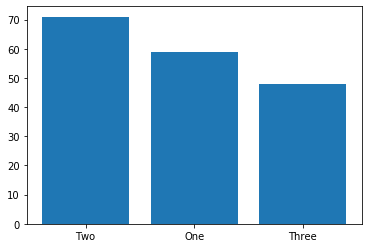

In [17]:
print(dt['Wine Type'].value_counts())
plt.bar(x = ['Two','One','Three'],height=dt['Wine Type'].value_counts())

In [14]:
y = dt['Wine Type']
x = dt.drop('Wine Type', axis = 1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [31]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
pred = tree.predict(x_test)
pred

array(['One', 'One', 'Two', 'Two', 'Three', 'Two', 'One', 'Two', 'Three',
       'Two', 'One', 'Three', 'Two', 'Two', 'Two', 'Three', 'Two', 'Two',
       'Three', 'One', 'Two', 'Two', 'One', 'One', 'Two', 'Two', 'One',
       'One', 'Two', 'One', 'Three', 'One', 'One', 'One', 'One', 'Three',
       'Two', 'Three', 'One', 'One', 'One', 'Three', 'Two', 'Two', 'Two',
       'Two', 'Two', 'Three', 'Two', 'Three', 'Two', 'Three', 'Two',
       'One'], dtype=object)

In [37]:
print(confusion_matrix(y_test,pred))

[[18  0  2]
 [ 0 12  1]
 [ 0  0 21]]


In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         One       1.00      0.90      0.95        20
       Three       1.00      0.92      0.96        13
         Two       0.88      1.00      0.93        21

    accuracy                           0.94        54
   macro avg       0.96      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54

